In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
import matplotlib.pyplot as plt

q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)

qc.reset(q)

qc.h(q[1])
qc.measure(q[1], c[1])

qc.h(q[2])
qc.measure(q[2], c[2])

qc.barrier()

qc.cx(q[1], q[0])
qc.ch(q[2], q[0])

qc.barrier()

qc.h(q[3])
qc.measure(q[3], c[3])

qc.barrier()

qc.ch(q[3], q[0])
qc.measure(q[0], c[0])


In [5]:
backend = Aer.get_backend('qasm_simulator')

def run_bb84(shots):
    bits = []
    for _ in range(shots):
        compiled = transpile(qc, backend)
        job = backend.run(compiled, shots=1)
        result = job.result().get_counts()
        key = list(result.keys())[0]
        yB, yA, xA, xB = map(int, key)
        bits.append([xA, yA, yB, xB])
    return bits


def sift_key(bits):
    kA = []
    kB = []
    for xA, yA, yB, xB in bits:
        if yA == yB:
            kA.append(xA)
            kB.append(xB)
    return kA, kB

samples = [16, 32, 64, 128, 256]
key_len = []
print("n\tkey length")
for n in samples:
    bits = run_bb84(n)
    kA, kB = sift_key(bits)
    key_len.append(len(kA))
    print(n, "\t", len(kA))

n	key length
16 	 11
32 	 16
64 	 33
128 	 69
256 	 115


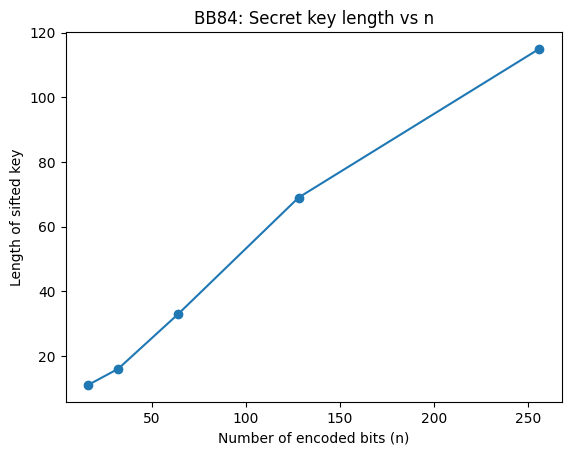

In [9]:
plt.plot(samples, key_len, marker='o')
plt.xlabel("Number of encoded bits (n)")
plt.ylabel("Length of sifted key")
plt.title("BB84: Secret key length vs n")
plt.savefig("outputs/bb84_key_length.png")
plt.show()